In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

# Ejercicio

## Manipulador PUMA

In [31]:
from sympy import var, sin, cos, Matrix, Integer, eye, Function, Rational, exp, Symbol, I, solve, pi, trigsimp
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

In [5]:
var("q:4")

In [6]:
var("l:4")

In [3]:
def denavit_hartenberg_general(a, d, α, θ, mat, sin, cos):
    Ai = mat([[cos(θ), -sin(θ)*cos(α), sin(θ)*sin(α), a*cos(θ)],
              [sin(θ), cos(θ)*cos(α), -cos(θ)*sin(α), a*sin(θ)],
              [0, sin(α), cos(α), d],
              [0, 0, 0, 1]])
    return Ai

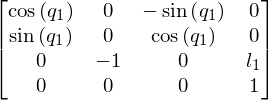

In [21]:
A1 = denavit_hartenberg_general(0, l1, -pi/2, q1, Matrix, sin, cos)
A1

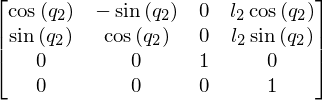

In [22]:
A2 = denavit_hartenberg_general(l2, 0, 0, q2, Matrix, sin, cos)
A2

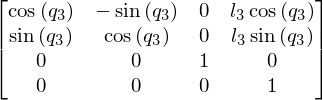

In [23]:
A3 = denavit_hartenberg_general(l3, 0, 0, q3, Matrix, sin, cos)
A3

In [34]:
T01 = A1
T02 = T01*A2
T03 = trigsimp(T02*A3)

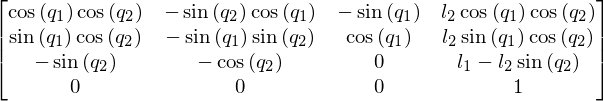

In [35]:
T02

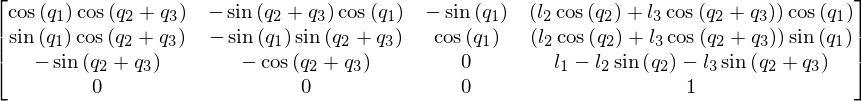

In [36]:
T03

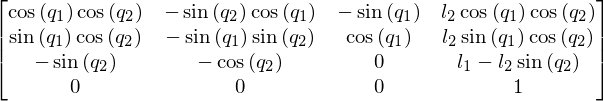

In [33]:
trigsimp(T02)

In [52]:
o0 = Matrix([[0], [0], [0]])
o1 = T01[:3, 3]
o2 = T02[:3, 3]
o3 = T03[:3, 3]

In [49]:
o1

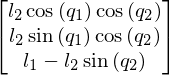

In [50]:
o2

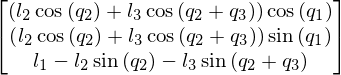

In [51]:
o3

In [54]:
z0 = Matrix([[0], [0], [1]])
z1 = T01[:3, 2]
z2 = T02[:3, 2]

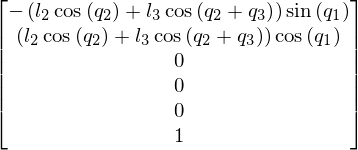

In [62]:
J1 = z0.cross(o3 - o0).col_join(z0)
J1

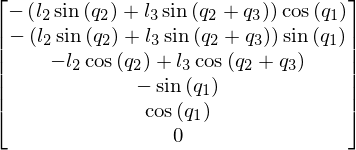

In [64]:
J2 = trigsimp(z1.cross(o3 - o1)).col_join(z1)
J2

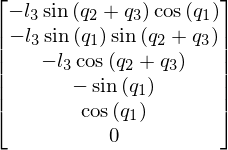

In [66]:
J3 = trigsimp(z2.cross(o3 - o2)).col_join(z2)
J3

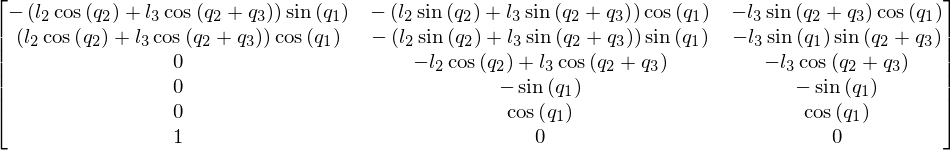

In [67]:
Jg = (J1.row_join(J2)).row_join(J3)
Jg